<a href="https://colab.research.google.com/github/Bryan-OLima/Bryan-OLima/blob/main/Imers%C3%A3o_Dados_4_pesquisa_de_imoveis_em_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [4]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [7]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7125,NaN,Jabaquara,São Paulo,160,2,1,2,R$ 700.000
4591,NaN,Morumbi,São Paulo,435,4,3,4,R$ 2.500.000
6301,"Rua Filipe Cardoso, 381",Cursino,São Paulo,340,3,4,4,R$ 2.300.000
2728,NaN,Pacaembu,São Paulo,890,4,7,7,R$ 4.600.000
2472,Avenida Iraí,Indianópolis,São Paulo,425,4,7,4,R$ 1.800.000
4874,NaN,Jardim Campo Grande,São Paulo,175,4,3,3,R$ 1.499.000
553,"Rua Major Alberto Barbosa, 37",Penha de França,São Paulo,125,3,2,2,R$ 550.000
2377,Rua General Sena Vasconcelos,Jardim Guedala,São Paulo,521,4,7,4,R$ 3.750.000
4130,"Rua Santa Rufina, 44",Jardim Santo Amaro,São Paulo,390,4,6,4,R$ 2.200.000
4793,NaN,Jardim Londrina,São Paulo,250,4,4,2,R$ 1.300.000


In [10]:
dados["Bairro"][6522]

'Vila Paulo Silas'

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [13]:
dados.Metragem.mean()

442.30065947242207

In [16]:
dados["Metragem"].mean()

442.30065947242207

In [18]:
sum((dados["Bairro"] == "Vila Mariana"))  #todo teste booleano em python, resulta em 0 = false e 1 = true. Se essa soma for maior que 0, significa que temos imóveis em tal lugar. No caso do exemplo, na vila mariana.

184

In [19]:
tem_imoveis_vila = (dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [21]:
dados[tem_imoveis_vila]

imoveis_vila_mariana = dados[tem_imoveis_vila]

imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [22]:
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

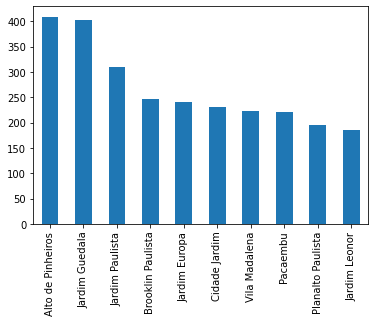

In [27]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

In [52]:
#1 - Realizar a média da metragem por bairro

imoveis_bairro = (dados["Bairro"] != "")
imovel_bairro = dados[imoveis_bairro]
imovel_bairro["Metragem"].mean()



442.30065947242207

In [61]:
#2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)
bairro = dados["Bairro"]
bairro

bairro2 = dados.Bairro
bairro2


0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

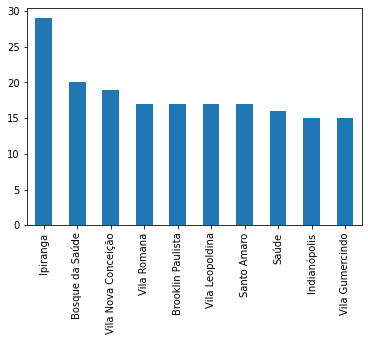

In [82]:
#3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF(DataFrame), tentar colocar alguma conclusão

#Pesquisar o tamanho das casas que teem 2 quartos
quartos = (dados["Quartos"] == 2)
tem_2_quartos = dados[quartos]
grafico_2_quartos = tem_2_quartos["Bairro"].value_counts()
grafico_2_quartos.head(10).plot.bar()


#concluimos que em SP existem 1195 casas á venda que tem 2 quartos.
#Concluimos também que o bairro do Ipiranga é o que mais tem casas com 2 quartos(29).



In [88]:
#4 - Pegar outras estatísticas dos dados, médias, mediana, min e max. 
dados["Metragem"].min()


10

In [89]:
#4
dados["Metragem"].max()

750000

In [90]:
#4 média
dados["Metragem"].mean()

442.30065947242207

In [92]:
#4 mediana
valores = (dados["Metragem"].min() + dados["Metragem"].max())/2
valores

375005.0

In [95]:
#4
metragem = (dados["Metragem"] == dados["Metragem"].max())
maior_casa = dados[metragem].value_counts()
maior_casa

Rua                          Bairro          Cidade     Metragem  Quartos  Banheiros  Vagas  Valor       
Avenida George Saville Dodd  Jardim Guedala  São Paulo  750000    5        9          6      R$ 7.000.000    1
dtype: int64

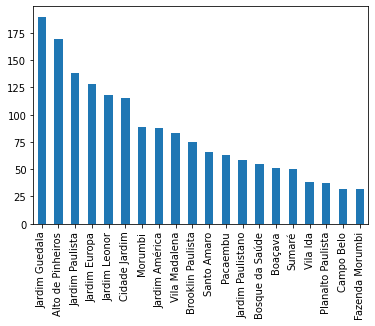

In [155]:
#5 - Identificar quais os bairros que não teem nome de rua.

ruas_s = dados['Rua'].isnull()
ruas_sem_nome = dados[ruas_s]
rua = ruas_sem_nome["Bairro"].value_counts().head(20)
rua.plot.bar()